<a href="https://colab.research.google.com/github/Alcoholic45/MINOR---PROJECT-IMAGE-/blob/main/ML_MINOR_MAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

In [2]:
!mkdir images


In [3]:
from bing_image_downloader import downloader
downloader.download('watermelon',limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/watermelon


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://all-americaselections.org/wp-content/uploads/2018/06/Watermelon_Bush_Cal_Sweet.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://0201.nccdn.net/1_2/000/000/15c/19d/Watermelon-Yellow-Buttercup-1800x1489.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.shopify.com/s/files/1/2550/8730/products/Watermelon_Georgia-Rattlesnake_stockAlex_shopify_1200x1200.jpg?v=1578326516
[%] File Downloaded !

[%] Downloading Image #4 from https://truegarden.com/wp-content/uploads/2018/03/watermelon-tower-garden-seedlings.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.shopify.com/s/files/1/2550/8730/products/v-watermelon-bradford_1200x1200.jpg?v=1512510044
[%] File Downloaded !

[%] Downloading Image #6 from http://all-americaselections.org/wp-content/uploads/2016/09/Watermelon_MiniLoveF1-1-square.jpg
[%]

In [4]:
downloader.download('banana',limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/banana


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://d3l207izes6a7a.cloudfront.net/images/article/hero/banana-beer.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.gpcpapers.com/wp-content/uploads/products/regular/TN-2743.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.racinesfortbragg.com/images/D/TN-2743Dt.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://newsunplug.com/wp-content/uploads/2020/10/Bananas.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.lima-europe.eu/wp-content/uploads/2017/04/Banana.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://yt3.ggpht.com/a/AATXAJzUbW6No_yuFCeS2-dY23iM7EzPiwsX58XqT1Jj=s900-c-k-c0xffffffff-no-rj-mo
[%] File Downloaded !

[%] Downloading Image #7 from https://s-media-cache-ak0.pinimg.com/736x/0d/ac/30/0dac301711b9e3e3422c0b19f34d5eed.jpg
[%] File Downloaded !

[%] 

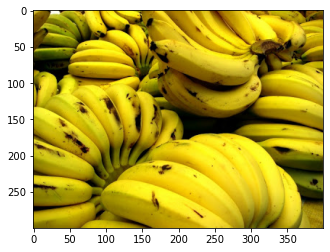

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target =[]
images = []
flat_data = []

DATADIR ='/content/images'   
CATEGORIES = ['watermelon','banana']

for category in CATEGORIES:  #print(category)
  class_num = CATEGORIES.index(category) 
  path = os.path.join(DATADIR,category) 
  for img in os.listdir(path):
     img_array = imread(os.path.join(path,img)) 
     plt.imshow(img_array)
     img_resized = resize(img_array,(150,150,3)) # resizing
     flat_data.append(img_resized.flatten()) #flattenig
     images.append(img_resized)
     target.append(class_num) 


flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

In [6]:
flat_data[0]

array([0.03529412, 0.03921569, 0.04313725, ..., 0.14328105, 0.10980392,
       0.09803922])

In [7]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

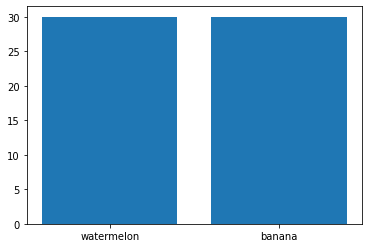

In [11]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

2500

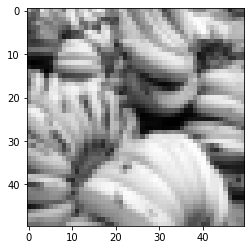

In [72]:
from skimage.color import rgb2gray

img_resize = resize(img_array,(50,50))
img_gray = rgb2gray(img_resize)
plt.imshow(img_gray,cmap='gray')
img_gray.size

In [76]:
import pandas as pd
df = pd.DataFrame(flat_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67460,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2


In [48]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state =100)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,101,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
svc = svm.SVC(probability=True)
grid = GridSearchCV(svc,param_grid)
grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 101, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [51]:
y_pred = grid.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [52]:
y_test

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.7222222222222222

In [54]:
confusion_matrix(y_pred,y_test)

array([[9, 4],
       [1, 4]])

In [55]:
import pickle
pickle.dump(grid,open('img_model.p','wb'))

In [56]:
model = pickle.load(open('img_model.p','rb'))

Enter URLhttps://c.ndtvimg.com/2019-04/dl9g6gn8_bananas_625x300_11_April_19.jpg
(350, 620, 3)
PREDICTED OUTPUT:banana


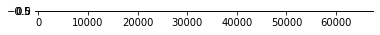

In [64]:
flat_data = []  
url = input('Enter URL')
img = imread(url) 
img_resized = resize(img,(150,150,3)) 
flat_data.append(img_resized.flatten()) 
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(flat_data)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

In [65]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1
from pyngrok import ngrok

In [71]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding',False)
st.title('Image Classifier')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))
uploaded_file = st.file_uploader('choose an image.....',type='jpg')
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption= ('Uploaded Image'))

  if st.button('PREDICT'):
    CATEGORIES = ['watermelon','banana']
    st.write('Result......')
    flat_data = []
    img = np.array(img)
    img_resized = resize(img,(150,150,3)) #resizing
    flat_data.append(img_resized.flatten()) #flattening
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.write(f'PREDICTED OUTPUT:{y_out}')

Overwriting app.py


In [67]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://aaa0c00f110e.ngrok.io'